In [2]:
using DataFrames, CSV, Distances, DelimitedFiles, TravelingSalesmanHeuristics, Plots

In [3]:
dist_mat = zeros(17802,17802);

In [4]:
cities = CSV.read("cities_p.csv");

In [5]:
prime_idx = findall(cities[:primes] .== true);

In [8]:
min_dist = Inf
min_idx = 0
pos1 = [cities[:X][1],cities[:Y][1]]   
c = 1
prime_min_idx = 0
for idx=prime_idx
    pos2 = [cities[:X][idx],cities[:Y][idx]]
    d = euclidean(pos1, pos2)
    if d < min_dist
        min_dist = d
        min_idx = idx
        prime_min_idx = c 
    end
    c += 1
end
println("Start Prime: ", min_idx, " with distance: ", min_dist)
println(prime_idx[min_idx])
println(cities[:X][min_idx], " ", cities[:Y][min_idx])
println(cities[:X][prime_idx[prime_min_idx]], " ", cities[:Y][prime_idx[prime_min_idx]])

Start Prime: 5334 with distance: 22.56169754516685
52178
315.092520044541 2179.84653261954
315.092520044541 2179.84653261954


In [9]:
p1c = 1
println(length(prime_idx))
for p1 in prime_idx
    if (p1c % 100 == 0 && p1c <= 1000) || p1c % 1000 == 0
        println("p1c: ", p1c)
    end
    p2c = p1c+1
    for p2 in prime_idx[p1c+1:end]
        pos1 = [cities[:X][p1],cities[:Y][p1]]
        pos2 = [cities[:X][p2],cities[:Y][p2]]
        dist_mat[p1c,p2c] = euclidean(pos1,pos2) 
        dist_mat[p2c,p1c] = dist_mat[p1c,p2c]
        p2c += 1
    end
    p1c += 1
end

17802
p1c: 100
p1c: 200
p1c: 300
p1c: 400
p1c: 500
p1c: 600
p1c: 700
p1c: 800
p1c: 900
p1c: 1000
p1c: 2000
p1c: 3000
p1c: 4000
p1c: 5000
p1c: 6000
p1c: 7000
p1c: 8000
p1c: 9000
p1c: 10000
p1c: 11000
p1c: 12000
p1c: 13000
p1c: 14000
p1c: 15000
p1c: 16000
p1c: 17000


In [20]:
path, cost = nearest_neighbor(dist_mat; do2opt=false)

([4902, 10418, 2750, 12167, 8741, 17534, 14419, 7770, 11090, 10180  …  17540, 13767, 4071, 9429, 7951, 1856, 16993, 12671, 3391, 4902], 436451.15099197184)

In [10]:
path_f, cost_f = farthest_insertion(dist_mat; do2opt=false, firstcity=prime_min_idx)

([706, 9390, 11017, 2706, 9809, 7540, 6644, 14348, 5404, 8513  …  1900, 9217, 14724, 13810, 14743, 6636, 16717, 13742, 14180, 706], 394988.47449173284)

In [11]:
writedlm("prime_path", prime_idx[path_f])

In [19]:
for r = 1:10
    println(dist_mat[r,17793:end]) 
end

[2823.9, 3432.34, 3426.92, 2708.66, 1527.42, 848.232, 2368.57, 462.037, 2818.79, 1000.29]
[4048.95, 4669.92, 4497.39, 3893.48, 2714.84, 715.46, 2958.96, 782.3, 3875.39, 1969.13]
[2456.04, 2556.21, 1830.6, 1469.86, 1893.17, 2524.15, 1090.79, 1991.68, 1208.73, 718.793]
[3987.55, 3942.54, 2590.92, 2789.04, 3377.88, 3235.07, 485.693, 2658.76, 2136.04, 1781.12]
[2863.68, 2621.09, 1203.98, 1479.05, 2688.97, 3458.47, 972.46, 2907.35, 735.234, 1649.08]
[2028.73, 1515.78, 487.545, 570.512, 2427.26, 3890.06, 2134.35, 3426.23, 457.23, 2204.96]
[3681.74, 4280.61, 4107.56, 3494.87, 2366.11, 593.101, 2646.11, 397.237, 3486.21, 1579.33]
[3499.94, 3457.41, 2186.38, 2305.73, 2941.29, 3039.71, 26.8204, 2458.32, 1686.75, 1417.08]
[2997.87, 3620.93, 3609.51, 2900.86, 1683.02, 667.625, 2475.64, 293.507, 2998.8, 1152.07]
[1826.0, 1266.43, 658.483, 446.027, 2346.24, 3929.73, 2353.41, 3490.39, 693.19, 2304.08]


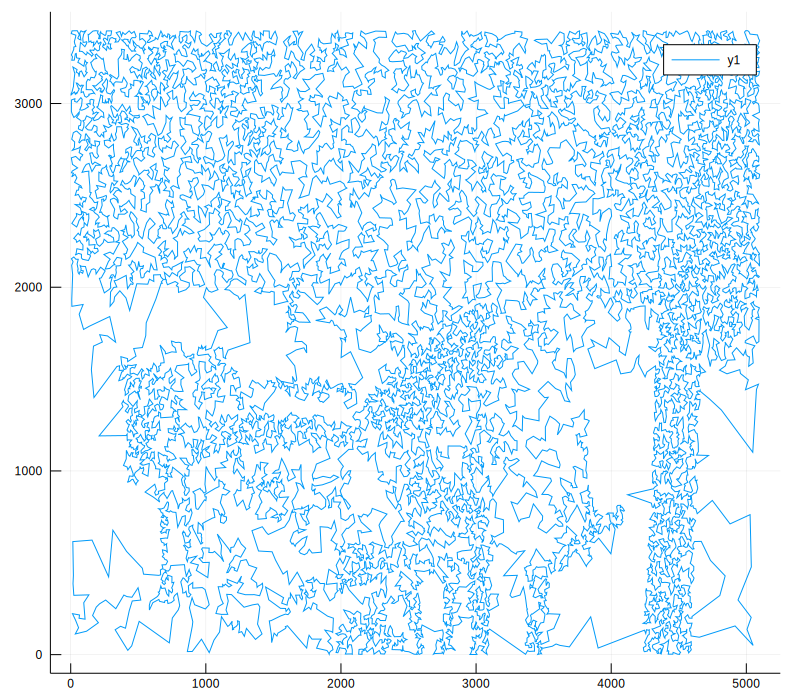

In [57]:
gr()
width = 800
height = 700
# plot(cities[:X][prime_idx], cities[:Y][prime_idx], markersize=1, seriestype=:scatter,size = (width, height))
plot(cities[:X][prime_idx[path_f]], cities[:Y][prime_idx[path_f]], markersize=1, seriestype=:path,size = (width, height))